In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot, cm

from scipy import signal

# Example - Butterworth Filter

<IPython.core.display.Javascript object>


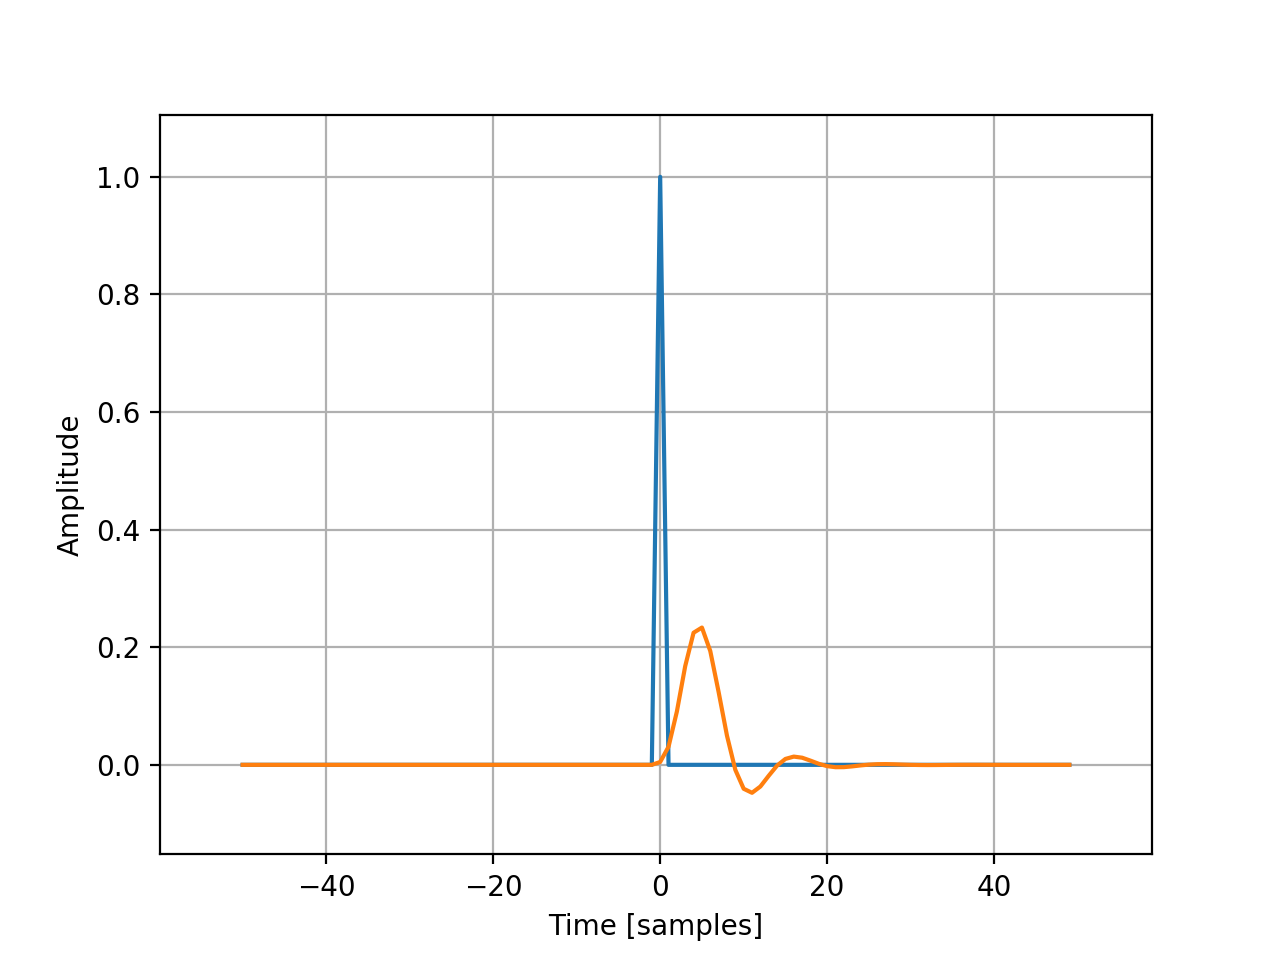

In [2]:
imp = signal.unit_impulse(100, 'mid')
b, a, = signal.butter(4, 0.2)
response = signal.lfilter(b, a, imp)

pyplot.plot(np.arange(-50, 50), imp)
pyplot.plot(np.arange(-50, 50), response)
pyplot.margins(0.1, 0.1)
pyplot.xlabel('Time [samples]')
pyplot.ylabel('Amplitude')
pyplot.grid(True)
pyplot.show()

# Dirac Comb

Let's work out the math to create a dirac comb.

- Image Size: We will set at 1024 for now, must be a power of 2, so for now 10 = log2(1024)
- Sampling Frequency: Must be \(>= 1\) pixel, again must be a power of 2
-

<IPython.core.display.Javascript object>


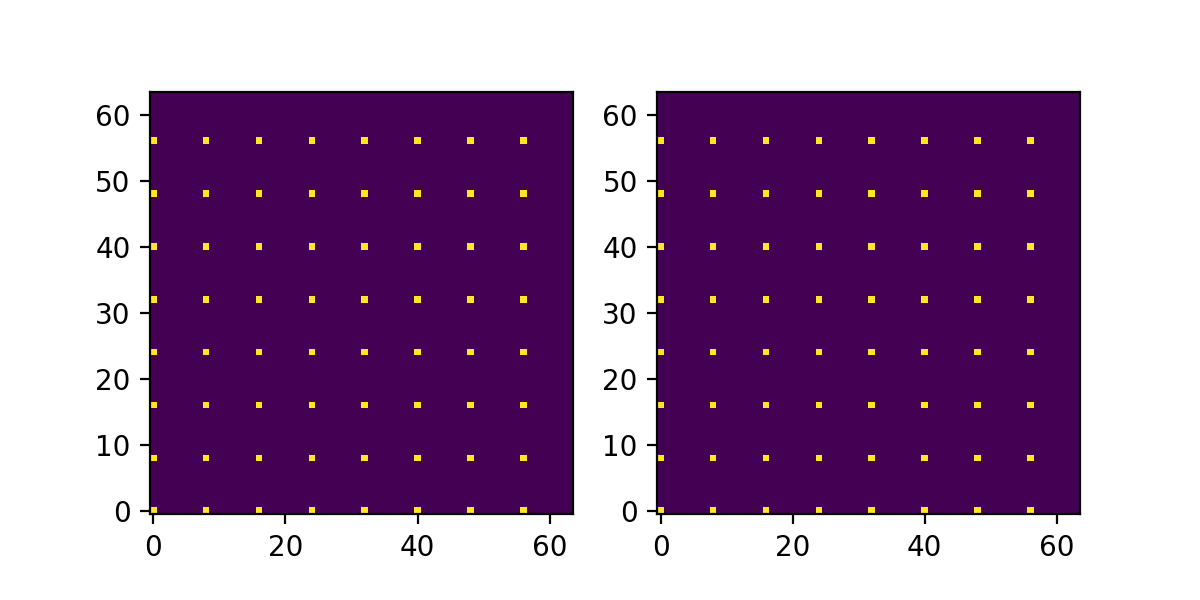

In [3]:
imPow = 6
imSize = np.power(2, imPow)
sPow = 3
spacing = np.power(2, sPow)
# let's see if I can play a trick to get this more quickly
# now do with the dirac function
dImage = signal.unit_impulse((spacing, spacing))
dImage = np.tile(dImage, (np.power(2,imPow-sPow), np.power(2,imPow-sPow)))
# fourier transform the image
imNorm = imSize * imSize
latticeFFT = np.fft.fftshift(np.fft.fft2(dImage)/imNorm)
conjFFT = np.conjugate(latticeFFT)
latticeFFT = np.sqrt(np.real(np.multiply(latticeFFT, conjFFT)))
# display the image
fig = pyplot.figure(figsize=(6,3))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.imshow(dImage, origin="lower")
ax1.imshow(latticeFFT, origin="lower")

# Analyze

<IPython.core.display.Javascript object>


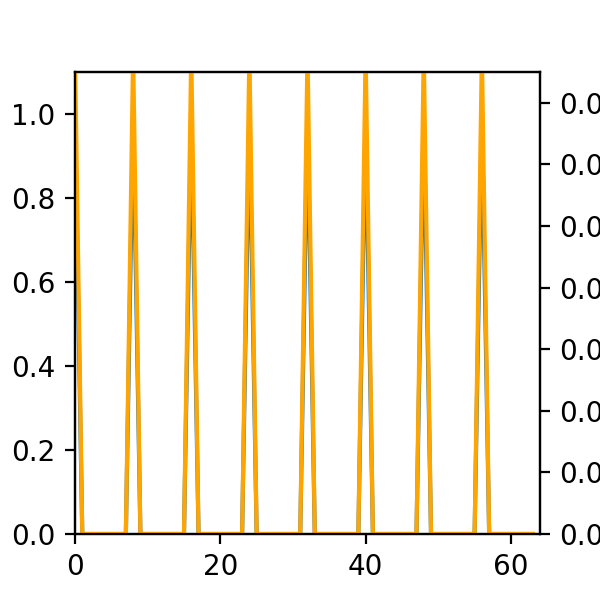

(0, 0.015)

In [4]:
# run a line across

rValues = dImage[0,:]
kValues = latticeFFT[0,:]
# plot
fig = pyplot.figure(figsize=(3,3))
ax0 = fig.add_subplot(111)
ax1 = pyplot.twinx(ax0)
ax0.plot(np.arange(imSize), rValues)
ax0.set_xlim(0, imSize)
ax0.set_ylim(0, 1.1)
ax1.plot(np.arange(imSize), kValues, color='orange')
ax1.set_ylim(0, 0.015)